<a href="https://colab.research.google.com/github/ludwigwittgenstein2/Research/blob/master/simple_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Perceptron

1. Form of Linear Classifier 

# Linear Seperation Example
# 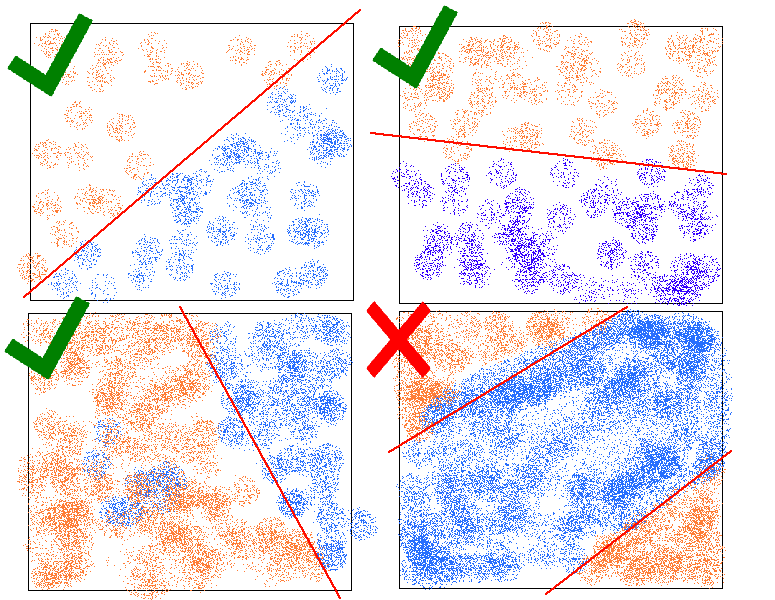



In [1]:
#Import Library
import pandas as pd
import numpy as np
import random

In [2]:
#Create a Dataset
#20 x 20 plane

df = pd.DataFrame()
df['x'] = [random.randint(1,20) for x in range(10)]
df['y'] = [random.randint(1,20) for x in range(10)]
df.head()

,x,y
0,18,19
1,11,7
2,8,9
3,8,11
4,16,2


In [3]:
#Label 
#

label=[]
for i in range(df.shape[0]):
  if df.iloc[i,0] < df.iloc[i,1]:
    label.append(1)
  else:
    label.append(-1)
 
df['label'] = label
df

,x,y,label
0,18,19,1
1,11,7,-1
2,8,9,1
3,8,11,1
4,16,2,-1
5,4,16,1
6,20,16,-1
7,17,18,1
8,20,4,-1
9,16,17,1


In [4]:
#We can't put zero value
#We can use random uniform distribution for weights
#So, we have bias and weights


weights = [np.round(random.uniform(-0.99,0.99),2) for i in range(2)]

In [5]:
#We multiply weight with input data point and sum

w = weights.copy()
X = [[df.iloc[i,0],df.iloc[i,1]] for i in range(df.shape[0])]
wx = [X[i][0]*w[0]+X[i][1]*w[1] for i in range(df.shape[0])]


In [10]:
#So we have sum of weights and inputs for each point and sum

df

,x,y,label
0,18,19,1
1,11,7,-1
2,8,9,1
3,8,11,1
4,16,2,-1
5,4,16,1
6,20,16,-1
7,17,18,1
8,20,4,-1
9,16,17,1


In [7]:
#So, We have sum of weights and inputs for each point
#We plug values one at a time into activation function

for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = 0
  else:
    pred = 1

In [8]:
#We create Activation Function
#Perceptron takes the sum and gives us a label, 
#which we compare with original label and determine if it is correct
#If it is incorrect, error is found and weights are adjusted, so our solution moves to
#direction of original

#We use Signum Function

for i in range(df.shape[0]):
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    w[0] = w[0] + err
    w[1] = w[1] + err

In [11]:
#We expand activation function to take one datapoint at a time
#And Adjust the error

#We can see the output

for i in range(df.shape[0]):
  print('wx : ',wx[i])
  if wx[i]<=0:
    pred = -1
  else:
    pred = 1
  print('label=',df['label'][i])
  print('pred = ',pred)
  if pred != df['label'][i] :
    err = df['label'][i] - pred
    print('err',err)
    print('before', w[0],w[1])
    w[0] = w[0] + err
    w[1] = w[1] + err
    print('after',w[0],w[1])
  else:
    print('w_i', w[0],w[1])

wx :  -10.180000000000001
label= 1
pred =  -1
err 2
before 23.54 23.9
after 25.54 25.9
wx :  -5.760000000000001
label= -1
pred =  -1
w_i 25.54 25.9
wx :  -4.58
label= 1
pred =  -1
err 2
before 25.54 25.9
after 27.54 27.9
wx :  -4.78
label= 1
pred =  -1
err 2
before 27.54 27.9
after 29.54 29.9
wx :  -7.5600000000000005
label= -1
pred =  -1
w_i 29.54 29.9
wx :  -3.4400000000000004
label= 1
pred =  -1
err 2
before 29.54 29.9
after 31.54 31.9
wx :  -10.8
label= -1
pred =  -1
w_i 31.54 31.9
wx :  -9.620000000000001
label= 1
pred =  -1
err 2
before 31.54 31.9
after 33.54 33.9
wx :  -9.600000000000001
label= -1
pred =  -1
w_i 33.54 33.9
wx :  -9.06
label= 1
pred =  -1
err 2
before 33.54 33.9
after 35.54 35.9


Testing our Model on Another Database 

In [12]:
#Test Dataset
new_df = pd.DataFrame()
new_df['x'] = [random.randint(1,20) for x in range(100)]
new_df['y'] = [random.randint(1,20) for x in range(100)]
new_df.head()

,x,y
0,18,1
1,3,6
2,4,15
3,16,1
4,20,15


In [13]:
label_text = []
for i in range(new_df.shape[0]):
  if new_df.iloc[i,0] < new_df.iloc[i,1]:
    label_text.append(1)
  else:
    label_text.append(-1)
new_wX = w[0]*new_df['x']+w[1]*new_df['y']

In [14]:
print(new_wX)

0      675.62
1      322.02
2      680.66
3      604.54
4     1249.30
       ...   
95     966.06
96     716.20
97     609.58
98     966.78
99     607.78
Length: 100, dtype: float64


In [15]:
#We apply activation function, compare given labels with predicted labels

new_df['given label'] = label_text
pred_label_text = []
 
for i in range(new_df.shape[0]):
  if new_wX[i]>=0:
    pred_label_text.append(-1)
  else:
    pred_label_text.append(1)
 
new_df['predicted labels'] = pred_label_text

In [16]:
new_df

,x,y,given label,predicted labels
0,18,1,-1,-1
1,3,6,1,-1
2,4,15,1,-1
3,16,1,-1,-1
4,20,15,-1,-1
...,...,...,...,...
95,9,18,1,-1
96,5,15,1,-1
97,2,15,1,-1
98,7,20,1,-1
